# <b>Question 1</b>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sortedcontainers
import copy
%matplotlib inline

## <b>Part 1</b>

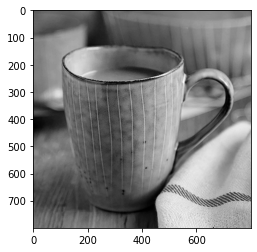

In [2]:
#Load image
cer = cv2.imread("images/ceramic.jpg",0)
plt.imshow(cer,cmap='gray')

In [3]:
# Make a filter
def kkFilter(k):
    return np.ones((k,k))/(k**2)

In [4]:
def padding(img,k):
    padNum = math.floor(k/2)
    imgP = np.zeros((img.shape[0]+(2*padNum),img.shape[1]+(2*padNum)))
#     print(imgP.shape)
    imgP[padNum:imgP.shape[0]-padNum, padNum:imgP.shape[1]-padNum] = img
    xStart = padNum
    xEnd = imgP.shape[0]-padNum
    yStart = padNum
    yEnd = imgP.shape[1]-padNum
#     print(img.shape)
    imgP[xStart:xEnd, yStart:yEnd] = img
    return imgP

In [5]:
def lowPassFilter(padPic,k):
    out = np.zeros_like(padPic)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(out.shape)
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            sumVal = 0
            #Define kernel range:
            kXs = i - padNum
            kYs = j - padNum
            kXe = i + padNum
            kYe = j + padNum
            for u in range(kXs,kXe+1):
                for v in range(kYs,kYe+1):
                    sumVal += padPic[u][v]/(k*k)
            out[i][j] = sumVal
            xStart = padNum
            xEnd = out.shape[0]-padNum
            yStart = padNum
            yEnd = out.shape[1]-padNum
    out = out[xStart:xEnd][yStart:yEnd]
    out = np.rint(out)
    return out.astype('uint8')

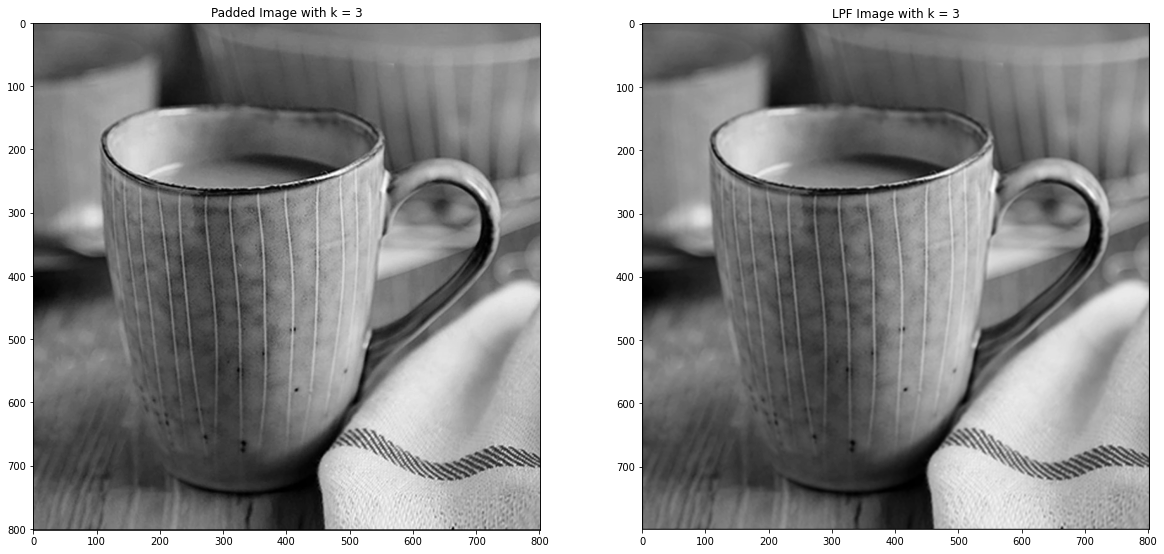

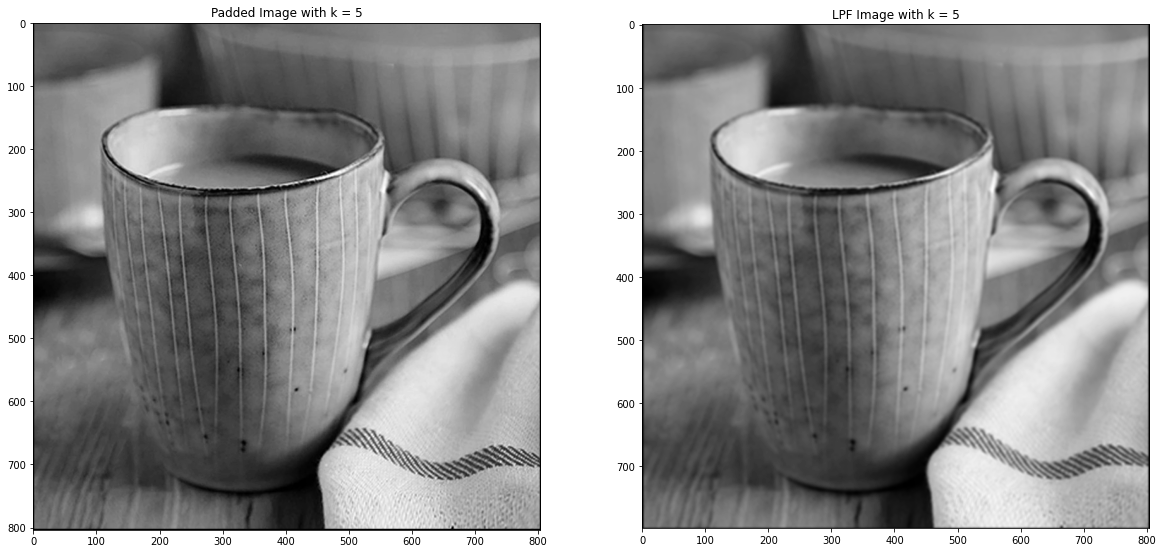

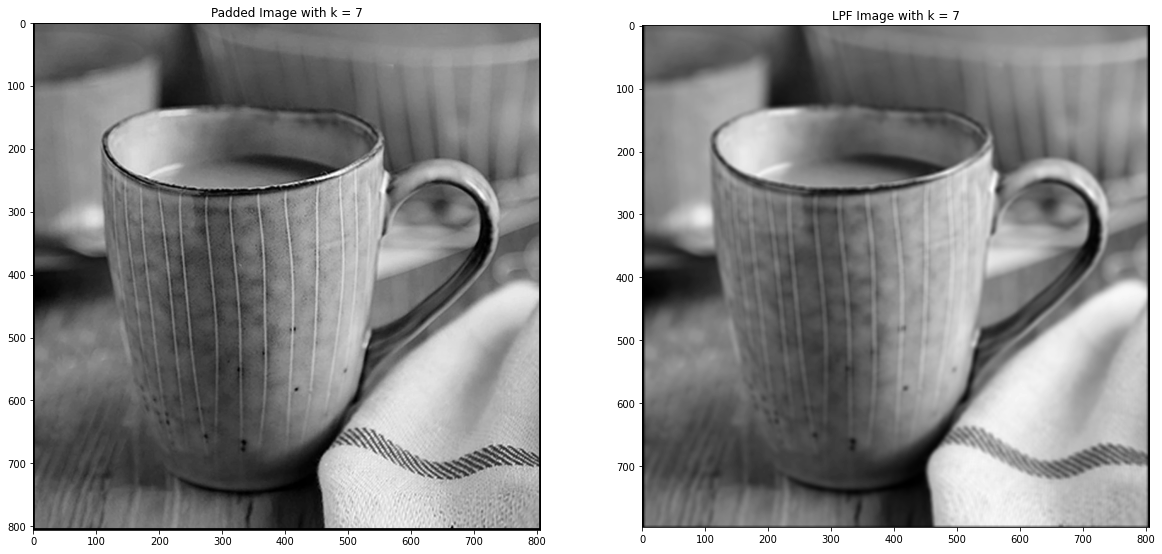

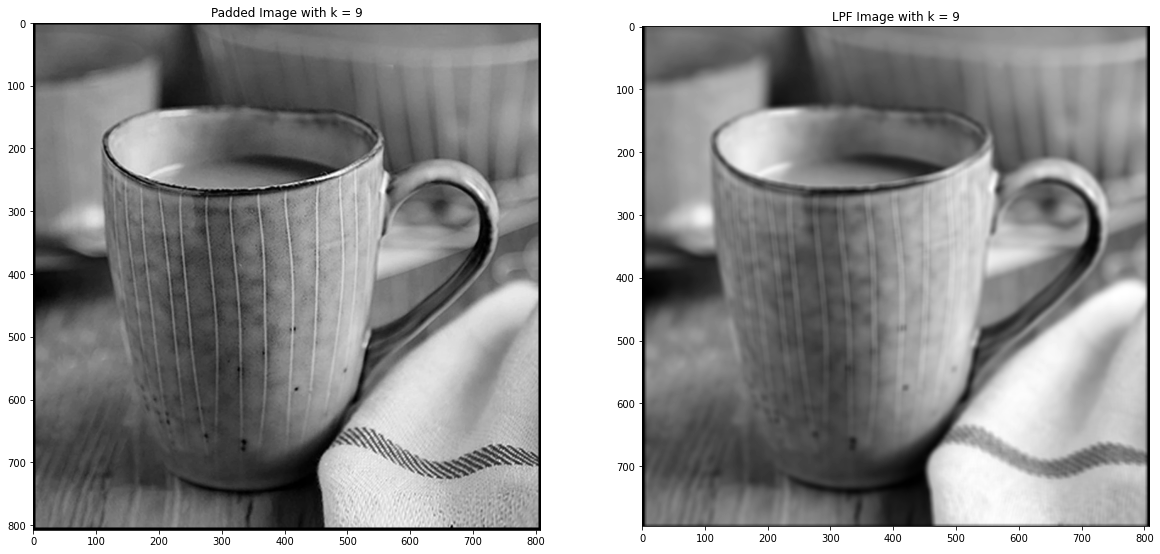

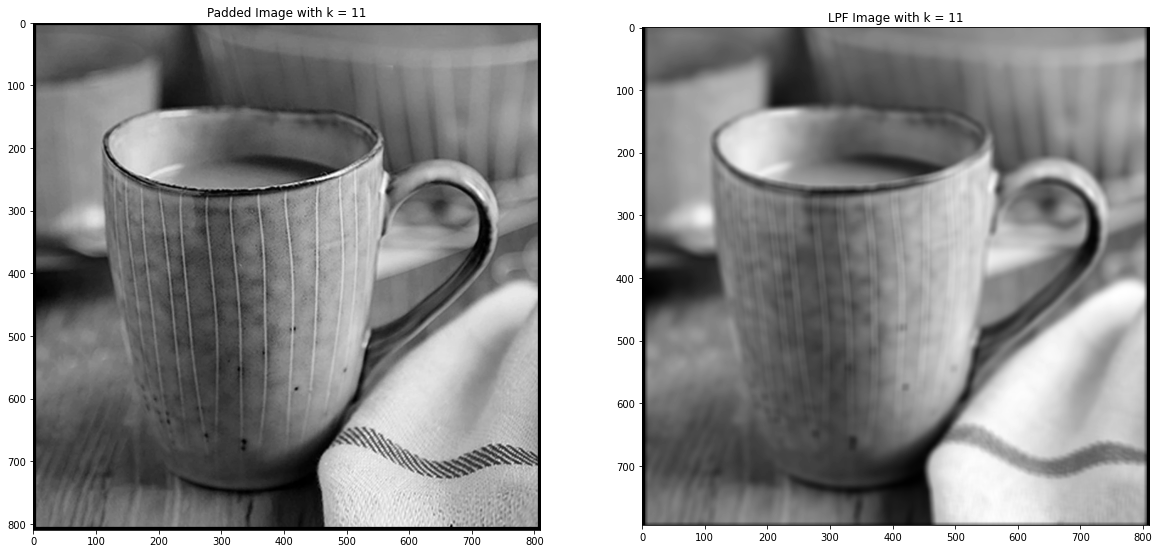

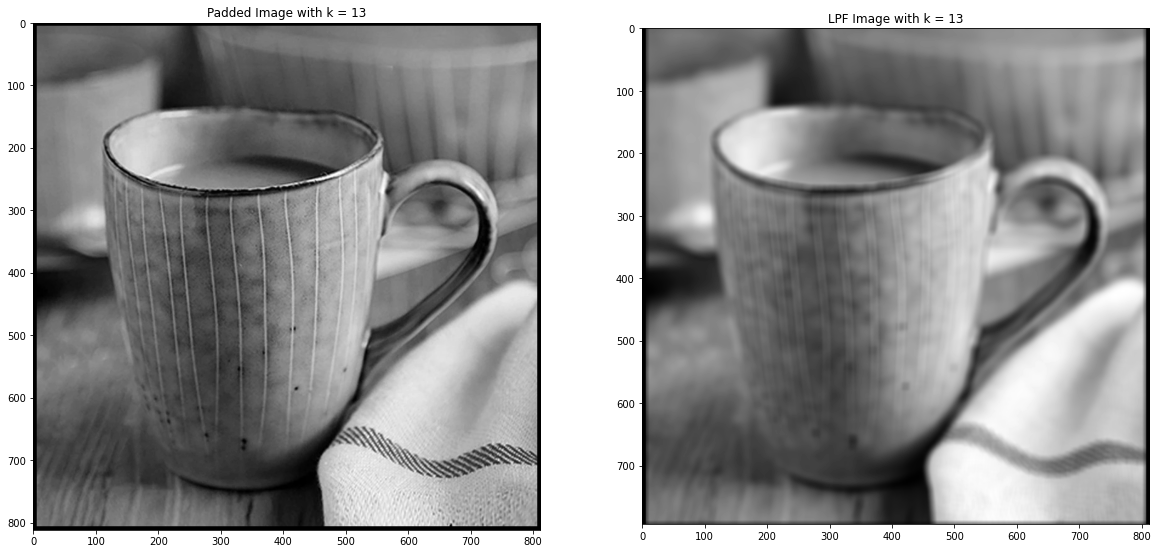

In [6]:
for i in range(1,7):
    k = (2*i)+1
    padCer = padding(cer,k)
#     print(kernel\\.shape)
#     print(padCer.shape)
    out = lowPassFilter(padCer,k)
    fig, axs = plt.subplots(1, 2,figsize=(20,20))
#     print(kerSize)
    axs[0].imshow(padCer,cmap='gray')
    axs[0].title.set_text('Padded Image with k = {}'.format(k))
    axs[1].imshow(out,cmap='gray')
    axs[1].title.set_text('LPF Image with k = {}'.format(k))

## <b>Part 2</b>

In [7]:
def avgFiltUpg(padPic,k):
    outP = np.zeros_like(padPic)
    padPic = padPic/(k*k)
    padNum = int(k/2)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    out = np.zeros_like(padPic)
    for i in range(outP.shape[0]):
        for j in range(outP.shape[1]):
            #Ignore edge cases(corners)
            #Initial
            if i==0 and j==0:
                outP[i,j] = padPic[i,j]
            elif i==0:
                outP[i,j] = padPic[i,j] + outP[i,j-1]
            elif j==0:
                outP[i,j] = padPic[i,j] + outP[i-1,j]
            else:
                outP[i,j] = padPic[i,j] + outP[i-1,j] + outP[i,j-1] - outP[i-1,j-1]
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            if i==padNum and j==padNum:
                out[i,j] = outP[i+padNum,j+padNum]
            elif i==padNum:
                out[i,j] = outP[i+padNum,j+padNum] - outP[i+padNum,j-padNum-1]
            elif j==padNum:
                out[i,j] = outP[i+padNum,j+padNum] - outP[i-padNum-1,j+padNum]
            else:
                out[i,j] = outP[i+padNum,j+padNum] - outP[i-padNum-1,j+padNum] - outP[i+padNum,j-padNum-1] + outP[i-padNum-1,j-padNum-1]
                    
    return out

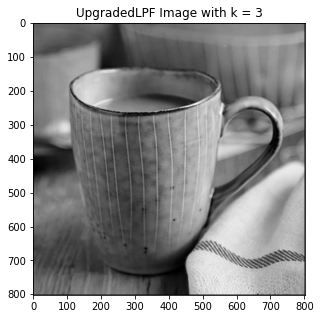

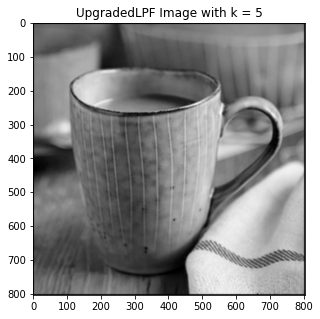

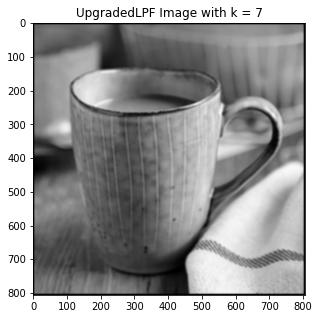

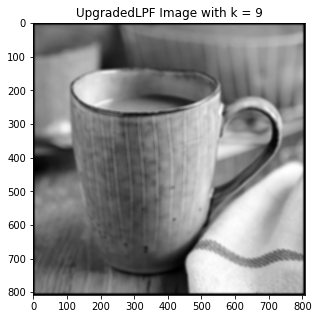

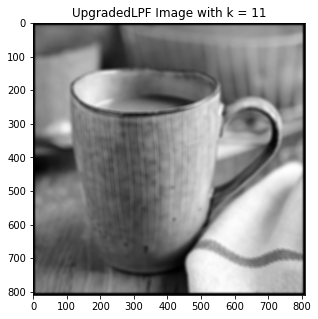

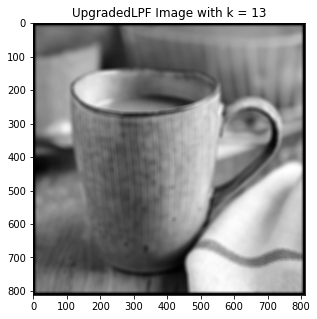

In [8]:
for i in range(1,7):
    k = (2*i)+1
    padCer = padding(cer,k)
#     print(kernel\\.shape)
#     print(padCer.shape)
    out = avgFiltUpg(padCer,k)
    fig, axs = plt.subplots(1,1,figsize=(5,5))
#     print(kerSize)
    axs.imshow(out,cmap='gray')
    axs.title.set_text('UpgradedLPF Image with k = {}'.format(k))

## <b>Part 3</b>

In [9]:
sizes = [pow(2,3),
        pow(2,4),
        pow(2,5),
        pow(2,6),
        pow(2,7),
        pow(2,8),
        pow(2,9)]
k_val = [3,5,7,9,11]
# img8   = cv2.resize(cer, (sizes[0],sizes[0]), interpolation = cv2.INTER_AREA)
# img16  = cv2.resize(cer, (sizes[1],sizes[1]), interpolation = cv2.INTER_AREA)
# img32  = cv2.resize(cer, (sizes[2],sizes[2]), interpolation = cv2.INTER_AREA)
# img64  = cv2.resize(cer, (sizes[3],sizes[3]), interpolation = cv2.INTER_AREA)
# img128 = cv2.resize(cer, (sizes[4],sizes[4]), interpolation = cv2.INTER_AREA)
# img256 = cv2.resize(cer, (sizes[5],sizes[5]), interpolation = cv2.INTER_AREA)
# img512 = cv2.resize(cer, (sizes[6],sizes[6]), interpolation = cv2.INTER_AREA)

In [10]:
upgrade = np.zeros((7,5))
noob = np.zeros((7,5))
for s in range(len(sizes)):
    img_siz = cv2.resize(cer, (sizes[s],sizes[s]), interpolation = cv2.INTER_AREA)
    for k in range(len(k_val)):
        kk = (2*k)+1
        padCer = padding(img_siz,kk)
        initial = time.time()
        out = avgFiltUpg(padCer,kk)
        upgrade[s][k] += time.time() - initial 
        initial = time.time()
        out = lowPassFilter(padCer,kk)
        noob[s][k] += time.time() - initial 

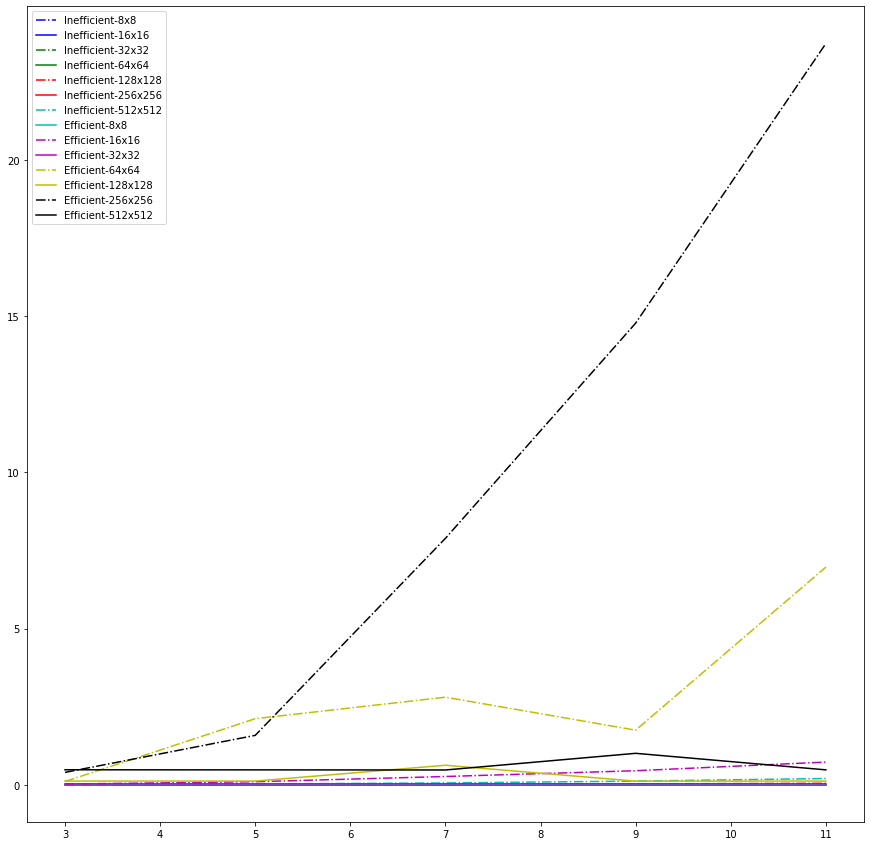

In [11]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(k_val,noob[0],'b-.')
plt.plot(k_val,upgrade[0],'b-')
plt.plot(k_val,noob[1],'g-.')
plt.plot(k_val,upgrade[1],'g-')
plt.plot(k_val,noob[2],'r-.')
plt.plot(k_val,upgrade[2],'r-')
plt.plot(k_val,noob[3],'c-.')
plt.plot(k_val,upgrade[3],'c-')
plt.plot(k_val,noob[4],'m-.')
plt.plot(k_val,upgrade[4],'m-')
plt.plot(k_val,noob[5],'y-.')
plt.plot(k_val,upgrade[5],'y-')
plt.plot(k_val,noob[6],'k-.')
plt.plot(k_val,upgrade[6],'k-')
plt.legend(['Inefficient-8x8','Efficient-8x8','Inefficient-16x16','Efficient-16x16','Inefficient-32x32',
            'Efficient-32x32','Inefficient-64x64','Efficient-64x64','Inefficient-128x128','Efficient-128x128',
            'Inefficient-256x256','Efficient-256x256','Inefficient-512x512','Efficient-512x512'])plt.show()

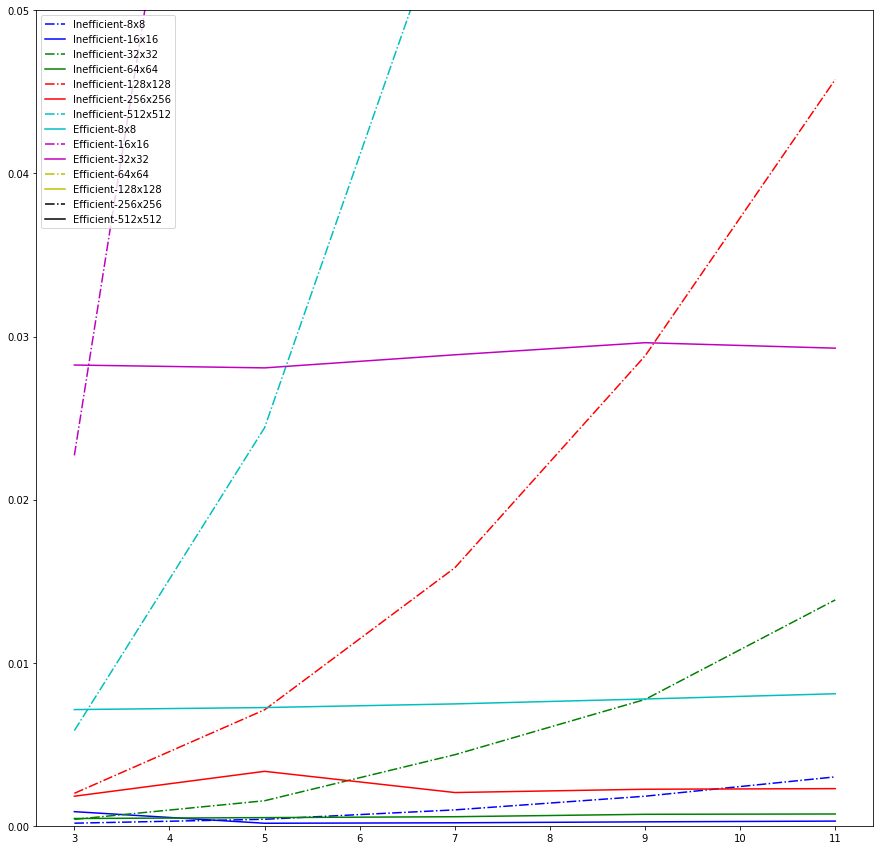

In [12]:
#Zoomed-in version
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(k_val,noob[0],'b-.')
plt.plot(k_val,upgrade[0],'b-')
plt.plot(k_val,noob[1],'g-.')
plt.plot(k_val,upgrade[1],'g-')
plt.plot(k_val,noob[2],'r-.')
plt.plot(k_val,upgrade[2],'r-')
plt.plot(k_val,noob[3],'c-.')
plt.plot(k_val,upgrade[3],'c-')
plt.plot(k_val,noob[4],'m-.')
plt.plot(k_val,upgrade[4],'m-')
plt.plot(k_val,noob[5],'y-.')
plt.plot(k_val,upgrade[5],'y-')
plt.plot(k_val,noob[6],'k-.')
plt.plot(k_val,upgrade[6],'k-')
plt.legend(['Inefficient-8x8','Efficient-8x8','Inefficient-16x16','Efficient-16x16','Inefficient-32x32',
            'Efficient-32x32','Inefficient-64x64','Efficient-64x64','Inefficient-128x128','Efficient-128x128',
            'Inefficient-256x256','Efficient-256x256','Inefficient-512x512','Efficient-512x512'])
plt.ylim([0,0.05])
plt.show()

#### Observation
From the two plots plotted above correlating k vs runTime, we see that the efficient method is clearly faster than normal method. This is more particularly evident as k increases

## <b>Part 4</b>

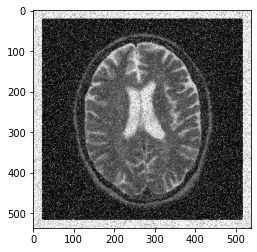

In [10]:
#Load image
brN = cv2.imread("images/brainNoisy.jpg",0)
br = cv2.imread("images/brain.jpg",0)
plt.imshow(brN,cmap='gray')

In [11]:
def medianFilter(padPic,k):
    outP = np.zeros_like(padPic)
    padNum = k//2
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    for i in range(xStart,xEnd):
        for j in range(yStart,yEnd):
            #Surrounding Values
            vals = padPic[i-padNum:i+padNum+1,j-padNum:j+padNum+1]
            vals = np.sort(vals,axis=None)
            index = (len(vals)-1)//2
            outP[i,j] = vals[index]
    return outP

Use the datastructure sortedList()<br>
![HOla](assets/DataStructureSortedList.png)

In [14]:
def medFiltUpg(img, k):
    imgP = padding(img,k)
    preCompRow = sortedcontainers.SortedList()
    preCompCol = sortedcontainers.SortedList()
    padNum = k//2
    r0 = imgP.shape[0]
    c0 = imgP.shape[0]
    xS = padNum
    xE = r0 - padNum
    yS = padNum
    yE = c0 - padNum
    out = np.copy(imgP)
    for i in range(xS,xE):
        # 2 cases: 1) Initial values 2) Precompute for rows
        #Standard
        if i!=xS:
            #Remove upper most rows and iterate through columns
            for l in imgP[i-(padNum+1),0:k]:
                preCompRow.discard(l)
            #Add the next lower row
            for l in imgP[i+padNum,0:k]:
                preCompRow.add(l)
        #Initialisation for the first kernel to be used for next vals
        else:
            for l in range(k):
                for m in range(k):
                    preCompRow.add(imgP[l,m])
        
        for j in range(yS,yE):
            if(j==padNum):
                preCompCol = copy.deepcopy(preCompRow)
            else:
                for l in imgP[i-padNum:i+padNum+1,j-padNum-1]:
                    preCompCol.discard(l)
                for l in imgP[i-padNum:i+padNum+1,j+padNum]:
                    preCompCol.add(l)
            out[i][j] = preCompCol[(int)((k**2)/2)]
                
    return out

#### Analysing efficiency by plotting k vs runtime

In [21]:
sizes = [pow(2,3),
        pow(2,4),
        pow(2,5),
        pow(2,6),
        pow(2,7),
        pow(2,8),
        pow(2,9),
        pow(2,10)]
k_val = [3,5,7,9,11,13]

In [23]:
upgrade = np.zeros((8,6))
noob = np.zeros((8,6))
for s in range(len(sizes)):
    img_siz = cv2.resize(cer, (sizes[s],sizes[s]), interpolation = cv2.INTER_AREA)
    for k in range(len(k_val)):
        kk = k_val[k]
        initial = time.time()
        out = medianFilter(img_siz,kk)
        upgrade[s][k] += time.time() - initial 
        
        initial = time.time()
        out = medFiltUpg(img_siz,kk)
        noob[s][k] += time.time() - initial 

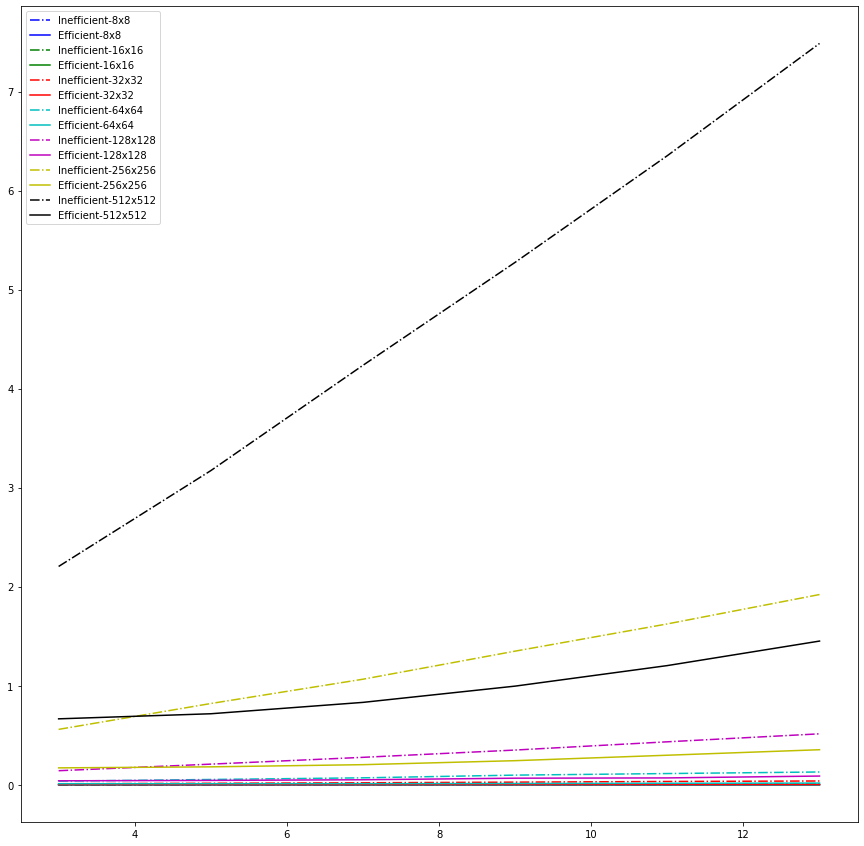

In [24]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(k_val,noob[0],'b-.')
plt.plot(k_val,upgrade[0],'b-')
plt.plot(k_val,noob[1],'g-.')
plt.plot(k_val,upgrade[1],'g-')
plt.plot(k_val,noob[2],'r-.')
plt.plot(k_val,upgrade[2],'r-')
plt.plot(k_val,noob[3],'c-.')
plt.plot(k_val,upgrade[3],'c-')
plt.plot(k_val,noob[4],'m-.')
plt.plot(k_val,upgrade[4],'m-')
plt.plot(k_val,noob[5],'y-.')
plt.plot(k_val,upgrade[5],'y-')
plt.plot(k_val,noob[6],'k-.')
plt.plot(k_val,upgrade[6],'k-')
plt.legend(['Inefficient-8x8','Efficient-8x8','Inefficient-16x16','Efficient-16x16','Inefficient-32x32',
            'Efficient-32x32','Inefficient-64x64','Efficient-64x64','Inefficient-128x128','Efficient-128x128',
            'Inefficient-256x256','Efficient-256x256','Inefficient-512x512','Efficient-512x512'])
plt.show()

## <b>Part 5<b>

Median filter is used to remove salt and pepper noises from an image while preserving edges. This is because considering that salt and pepper noises refers to black(0 val), white(255 val), when we take a median, most often the extremes will get filtered out i.e salt and pepper noise will get filtered out

In [28]:
k = np.array([3,5,7,9])
medBr1 = medFiltUpg(brN,k[0])
medBr2 = medFiltUpg(brN,k[1])
medBr3 = medFiltUpg(brN,k[2])
medBr4 = medFiltUpg(brN,k[3])

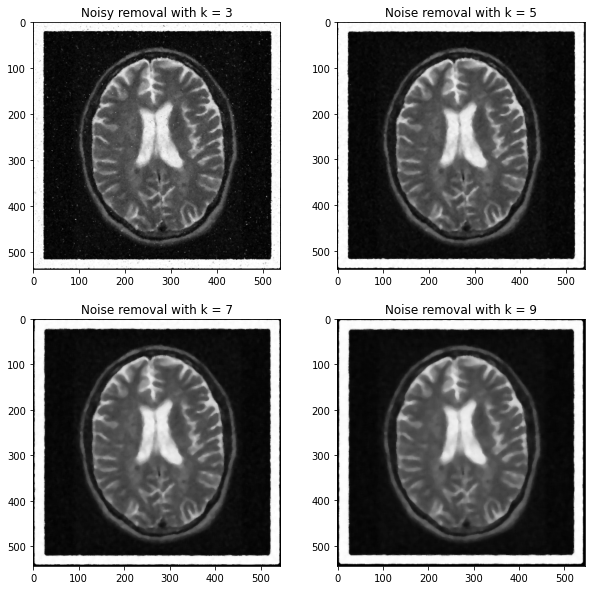

In [31]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0][0].imshow(medBr1,cmap='gray')
axs[0][0].title.set_text('Noisy removal with k = {}'.format(k[0]))
axs[0][1].imshow(medBr2,cmap='gray')
axs[0][1].title.set_text('Noise removal with k = {}'.format(k[1]))
axs[1][0].imshow(medBr3,cmap='gray')
axs[1][0].title.set_text('Noise removal with k = {}'.format(k[2]))
axs[1][1].imshow(medBr4,cmap='gray')
axs[1][1].title.set_text('Noise removal with k = {}'.format(k[3]))

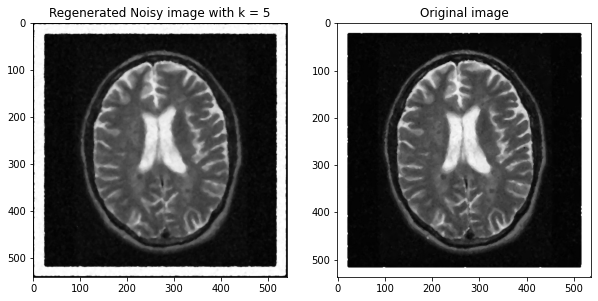

In [34]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(medBr2,cmap='gray')
axs[0].title.set_text('Regenerated Noisy image with k = {}'.format(k[1]))
axs[1].imshow(br,cmap='gray')
axs[1].title.set_text('Original image')

When k =5, we get the most optimal output as close to input as possible